In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

# Q1

## (a)

In [2]:
from numpy.random import uniform
N = 10000
xs = uniform(0, 2, N)
ys = uniform(0, 1, N)
fs = (xs*xs + ys)*3/11

Text(0.5, 0, 'density')

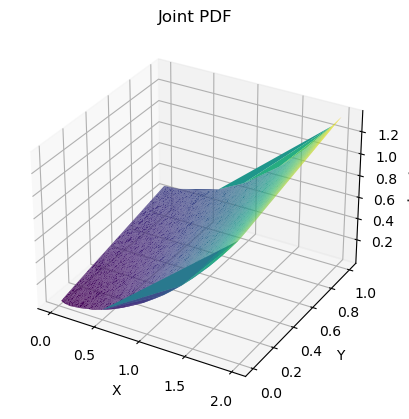

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(xs, ys, fs, cmap='viridis', edgecolor='none')
ax.set_title('Joint PDF');
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('density')

## (b)

Text(0, 0.5, 'density')

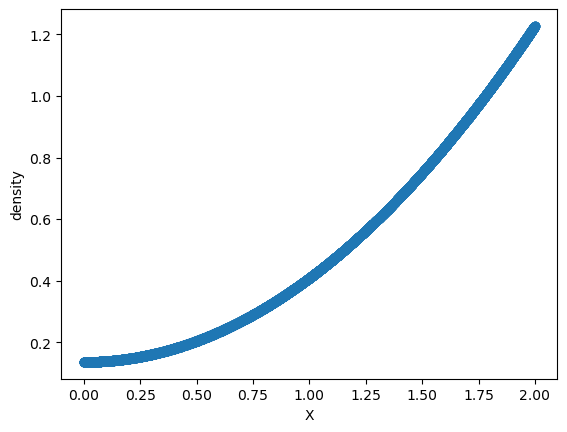

In [4]:
fxs = 3/22 + 3/11 * xs * xs
plt.scatter(xs, fxs)
plt.xlabel('X')
plt.ylabel('density')

## (c)

Text(0, 0.5, 'density')

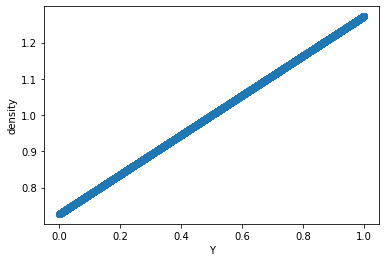

In [25]:
fys = 8/11 + 6/11 * ys
plt.scatter(ys, fys)
plt.xlabel('Y')
plt.ylabel('density')

## (d)

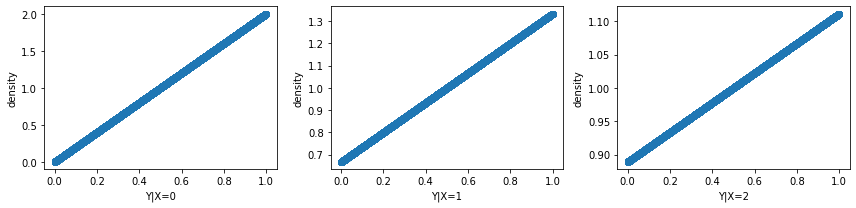

In [34]:
fy0s = 2 * ys
fy1s = (1+ys)*2/3
fy2s = (4+ys)*2/9

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=[12, 3])
for x, fyxs in enumerate([fy0s, fy1s, fy2s]):
    axes[x].scatter(ys, fyxs)
    axes[x].set_xlabel('Y|X='+str(x))
    axes[x].set_ylabel('density')
    
plt.tight_layout()

## (h)

Text(0, 0.5, 'Estimated Y')

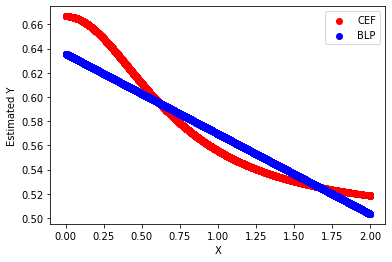

In [43]:
cefs = (xs*xs+2/3)/(2*xs*xs + 1)
blps = (96-10*xs)/151

plt.scatter(xs, cefs, color='red')
plt.scatter(xs, blps, color='blue')
plt.legend(['CEF', 'BLP'])
plt.xlabel('X')
plt.ylabel('Estimated Y')

# Q4

## (a)

In [59]:
X = np.array([[1,4], [1, -2], [1, 3], [1,-5]])
P = X @ np.linalg.inv(X.T@X) @ X.T
M = np.identity(P.shape[0]) - P
np.allclose(M @ P, 0)

True

## (b)

In [60]:
Q = np.array([[1, 3], [2, 8]])
XQ = X @ Q
PQ = XQ @ np.linalg.inv(XQ.T@XQ) @ XQ.T
MQ = np.identity(PQ.shape[0]) - PQ
np.allclose(MQ @ PQ, 0)

True

# Q5

## (a)

In [3]:
def ols(y, X, add_constant=True):
    if not all(v == 1 for v in X.T[0]) and add_constant:
        X = np.insert(X, 0, 1.0, axis=1)
    ybar = np.mean(y)
    xbar = np.mean(X, axis=0)
    cond = np.linalg.cond(X.T@X)
    print(f'Condition number is {cond}')
    beta = np.linalg.inv(X.T@X) @ X.T @ y
    e = y - X @ beta
    rsq = 1 - sum(e**2)/sum((y-ybar)**2)
    P = X @ np.linalg.inv(X.T@X) @ X.T
    M = np.identity(P.shape[0]) - P
    assert(np.allclose(M @ P, 0))
    assert(np.isclose(np.mean(e.T @ X), 0))
    return beta, rsq, P, M

In [3]:
X = pd.read_csv('X.csv', header=None).T
X = X.set_index(0)
X.columns = ['X1', 'X2', 'X3']
X.index = X.index.astype(int)
Y = pd.read_csv('Y.csv', header=None, index_col=0)
Y.columns = ['Y1', 'Y2']
df = X.join(Y).dropna()
df.shape

(1110, 5)

In [7]:
df.corr()

,X1,X2,X3,Y1,Y2
X1,1.000000,0.319333,0.235856,0.956510,0.739294
X2,0.319333,1.000000,0.124759,0.217038,0.203836
X3,0.235856,0.124759,1.000000,0.058730,0.521571
Y1,0.956510,0.217038,0.058730,1.000000,0.655981
Y2,0.739294,0.203836,0.521571,0.655981,1.000000


In [8]:
ols(df['Y1'].to_numpy(), df[['X1', 'X2', 'X3']].to_numpy())

Condition number is 32.32350578905897


(array([ 0.36075732,  1.02258321, -0.14831037, -0.26284836]),
 0.9514861152178427,
 array([[2.84729497e-03, 6.41515546e-04, 1.36669947e-03, ...,
         2.68538530e-05, 1.38132775e-03, 4.71777614e-04],
        [6.41515546e-04, 2.45903104e-03, 1.10550603e-03, ...,
         2.31932142e-03, 1.11285195e-03, 3.51741472e-04],
        [1.36669947e-03, 1.10550603e-03, 1.12024194e-03, ...,
         1.37440853e-03, 1.06156608e-03, 1.12332294e-03],
        ...,
        [2.68538530e-05, 2.31932142e-03, 1.37440853e-03, ...,
         5.78614940e-03, 9.01568593e-04, 3.78068052e-03],
        [1.38132775e-03, 1.11285195e-03, 1.06156608e-03, ...,
         9.01568593e-04, 1.06958537e-03, 6.66731135e-04],
        [4.71777614e-04, 3.51741472e-04, 1.12332294e-03, ...,
         3.78068052e-03, 6.66731135e-04, 4.27613368e-03]]),
 array([[ 9.97152705e-01, -6.41515546e-04, -1.36669947e-03, ...,
         -2.68538530e-05, -1.38132775e-03, -4.71777614e-04],
        [-6.41515546e-04,  9.97540969e-01, -1.10550603e-

In [9]:
ols(df['Y2'].to_numpy(), df[['X1', 'X2', 'X3']].to_numpy())

Condition number is 32.32350578905897


(array([-0.1765854 ,  1.24368112, -0.17476801,  1.05424915]),
 0.6770470562833217,
 array([[2.84729497e-03, 6.41515546e-04, 1.36669947e-03, ...,
         2.68538530e-05, 1.38132775e-03, 4.71777614e-04],
        [6.41515546e-04, 2.45903104e-03, 1.10550603e-03, ...,
         2.31932142e-03, 1.11285195e-03, 3.51741472e-04],
        [1.36669947e-03, 1.10550603e-03, 1.12024194e-03, ...,
         1.37440853e-03, 1.06156608e-03, 1.12332294e-03],
        ...,
        [2.68538530e-05, 2.31932142e-03, 1.37440853e-03, ...,
         5.78614940e-03, 9.01568593e-04, 3.78068052e-03],
        [1.38132775e-03, 1.11285195e-03, 1.06156608e-03, ...,
         9.01568593e-04, 1.06958537e-03, 6.66731135e-04],
        [4.71777614e-04, 3.51741472e-04, 1.12332294e-03, ...,
         3.78068052e-03, 6.66731135e-04, 4.27613368e-03]]),
 array([[ 9.97152705e-01, -6.41515546e-04, -1.36669947e-03, ...,
         -2.68538530e-05, -1.38132775e-03, -4.71777614e-04],
        [-6.41515546e-04,  9.97540969e-01, -1.10550603e-

In [13]:
def t_test(y, X, beta, b0, add_constant=True):
    if not all(v == 1 for v in X.T[0]) and add_constant:
        X = np.insert(X, 0, 1.0, axis=1)
    df = X.shape[0]-len(beta)-1
    e = y - X@beta
    stderr = sum(e * e)/df
    std = stderr * np.sqrt(np.diagonal(np.linalg.inv(X.T@X)))
    t = (beta-b0)/std
    alphas = [0.01, 0.05, 0.1]
    for alpha in alphas:
        critical = scipy.stats.t.ppf(q=1-alpha/2,df=df)
        print(f't-test for alpha={alpha} with df={df}: critical value at {critical}')
        for i, tv in enumerate(t):
            sig = 'Significant' if abs(tv) >= critical else 'Insignificant'
            print(f'beta{i}: {tv} - {sig}')
        print('-------------')
    return t

In [14]:
beta1, _, _, _ = ols(df['Y1'].to_numpy(), df[['X1', 'X2', 'X3']].to_numpy())
t_test(df['Y1'].to_numpy(), df[['X1', 'X2', 'X3']].to_numpy(), beta1, 0)

Condition number is 32.32350578905897
t-test for alpha=0.01 with df=1105: critical value at 2.5802859124297437
beta0: 8.633239472637895 - Significant
beta1: 122.22238206817048 - Significant
beta2: -10.826766883592793 - Significant
beta3: -21.46809541750261 - Significant
-------------
t-test for alpha=0.05 with df=1105: critical value at 1.9621131498088926
beta0: 8.633239472637895 - Significant
beta1: 122.22238206817048 - Significant
beta2: -10.826766883592793 - Significant
beta3: -21.46809541750261 - Significant
-------------
t-test for alpha=0.1 with df=1105: critical value at 1.646233767408057
beta0: 8.633239472637895 - Significant
beta1: 122.22238206817048 - Significant
beta2: -10.826766883592793 - Significant
beta3: -21.46809541750261 - Significant
-------------


array([  8.63323947, 122.22238207, -10.82676688, -21.46809542])

In [15]:
beta1, _, _, _ = ols(df['Y2'].to_numpy(), df[['X1', 'X2', 'X3']].to_numpy())
t_test(df['Y2'].to_numpy(), df[['X1', 'X2', 'X3']].to_numpy(), beta1, 0)

Condition number is 32.32350578905897
t-test for alpha=0.01 with df=1105: critical value at 2.5802859124297437
beta0: -0.18311598152522185 - Insignificant
beta1: 6.441306429053197 - Significant
beta2: -0.5528432608780679 - Insignificant
beta3: 3.731164005626812 - Significant
-------------
t-test for alpha=0.05 with df=1105: critical value at 1.9621131498088926
beta0: -0.18311598152522185 - Insignificant
beta1: 6.441306429053197 - Significant
beta2: -0.5528432608780679 - Insignificant
beta3: 3.731164005626812 - Significant
-------------
t-test for alpha=0.1 with df=1105: critical value at 1.646233767408057
beta0: -0.18311598152522185 - Insignificant
beta1: 6.441306429053197 - Significant
beta2: -0.5528432608780679 - Insignificant
beta3: 3.731164005626812 - Significant
-------------


array([-0.18311598,  6.44130643, -0.55284326,  3.73116401])

In [4]:
matrix = np.array([[1,2],[3,4]])

In [7]:
matrix * matrix

array([[ 1,  4],
       [ 9, 16]])

In [8]:
matrix**(-1)

ValueError: Integers to negative integer powers are not allowed.

In [9]:
df = pd.DataFrame(matrix)

In [11]:
df * df

,0,1
0,1,4
1,9,16


In [12]:
df ** (-1)

ValueError: Integers to negative integer powers are not allowed.